In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("train.csv", index_col = "PassengerId")
print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv("test.csv", index_col = "PassengerId")
print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

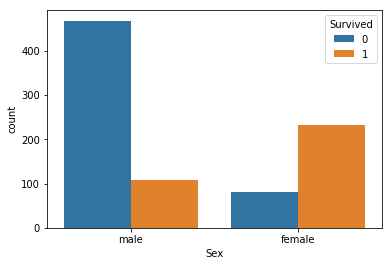

In [5]:
#성별 생존 분석
sns.countplot(data=train, x="Sex", hue="Survived")

In [6]:
#생존율계산(피벗) -여성 74%, 남성 18%

pd.pivot_table(train, index = "Sex", values="Survived")

,Survived
Sex,
female,0.742038
male,0.188908


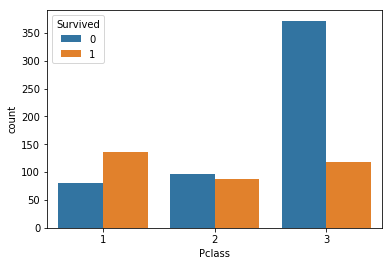

In [7]:
#객실등급별 생존 - 1등급의 생존이 훨씬 많다. 
sns.countplot(data=train, x="Pclass", hue="Survived")

In [9]:
#등급별 생존율-1등급 62%, 2등급 47%, 3등급 24% 

pd.pivot_table(train, index="Pclass", values="Survived")

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


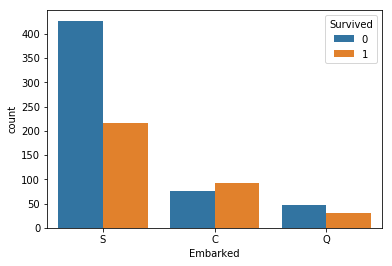

In [10]:
#선착장 
#S-사우스햄튼, Q-퀸즈타운, C-세스브루

sns.countplot(data=train, x="Embarked", hue="Survived")

In [11]:
#선착장에 따른 생존율 - 세스브루(C)에서 탑승한 승객들의 생존율이 제일 높다.
#하지만 사우스햄튼에서 탄 승객이 제일 많고, 제일 많기 때문에 가장 많이 사망한 것 같다. 


pd.pivot_table(train, index="Embarked", values="Survived")

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


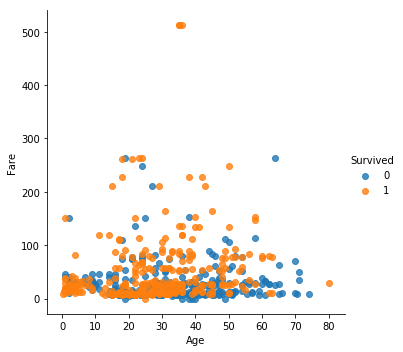

In [12]:
#나이와 운임요금. 
#lmplot으로 상관관계 확인 

sns.lmplot(data=train, x="Age", y="Fare", hue="Survived", fit_reg=False)

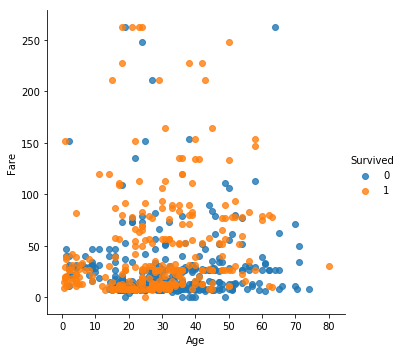

In [13]:
#요금 500달러 이상은 아웃라이어이므로 제거. 

low_fare = train[train["Fare"] < 500]
sns.lmplot(data=low_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

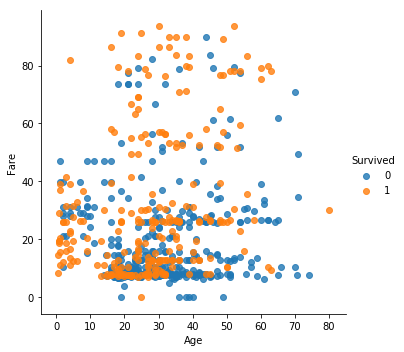

In [15]:
#요금 100 미만의 경우. 
#연령대가 30살이하일수록, 요금을 많이 낼수록 더 많이 생존.

low_fare = train[train["Fare"] < 100]
sns.lmplot(data=low_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

In [25]:
#연령대별로 나눠봄. 

def age_set(Age): 
    if 0 <= Age <= 19:
        return "00 ~ 19"
    elif 20 <= Age <= 29:
        return "20 ~ 29"
    elif 30 <= Age <= 39:
        return "30 ~ 39"
    elif 40 <= Age <= 49:
        return "40 ~ 49"
    elif 50 <= Age <= 59:
        return "50 ~ 59"
    elif 60 <= Age <= 69:
        return "60 ~ 69"
    elif Age > 70:
        return "70 ~ 99"
 
    
train["Age(Group)"] = train["Age"].apply(age_set)

print(train.shape)

train[["Age", "Age(Group)"]].head()

(891, 12)


,Age,Age(Group)
PassengerId,,
1,22.0,20 ~ 29
2,38.0,30 ~ 39
3,26.0,20 ~ 29
4,35.0,30 ~ 39
5,35.0,30 ~ 39


In [36]:
#나이로 피벗테이블 확인


pd.pivot_table(train, index ="Age(Group)",
              values = "Survived",
              aggfunc = ["mean", "sum"])

,mean,sum
,Survived,Survived
Age(Group),,
00 ~ 19,0.481707,79
20 ~ 29,0.350000,77
30 ~ 39,0.437126,73
40 ~ 49,0.382022,34
50 ~ 59,0.416667,20
60 ~ 69,0.315789,6
70 ~ 99,0.200000,1


In [32]:
#요금별 생존 확인 

def fare_set(fare): 
    if 0 <= fare <= 20:
        return "0 ~ 20"
    elif 21 <= fare <= 40:
        return "21 ~ 40"
    elif 41 <= fare <= 60:
        return "41 ~ 60"
    elif 61 <= fare <= 80:
        return "61 ~ 80"
    elif 81 <= fare <= 100:
        return "81 ~ 100"
    elif 101 <= fare <= 150:
        return "101 ~ 150"
    elif 151 <= fare <= 200:
        return "151 ~ 200"
    elif 200 <= fare <= 250:
        return "201 ~ 250"
    elif 251 <= fare <= 300:
        return "251 ~ 300"
    elif fare > 301:
        return "301 ~ 999"
 
    
train["Fare(Group)"] = train["Fare"].apply(fare_set)

print(train.shape)

train[["Fare", "Fare(Group)"]].head()

(891, 13)


,Fare,Fare(Group)
PassengerId,,
1,7.2500,0 ~ 20
2,71.2833,61 ~ 80
3,7.9250,0 ~ 20
4,53.1000,41 ~ 60
5,8.0500,0 ~ 20


In [35]:
# 요금별 피벗테이블 확인
#처음에는 50달러 단위로 나눴는데, 100달러 아래의 생존인원이 지나치게(?)많다는 생각이 들었음
#100달러 이하는 20달러 단위로 나눠서 확인.

pd.pivot_table(train, index ="Fare(Group)",
              values = "Survived",
              aggfunc = ["mean", "sum"])

,mean,sum
,Survived,Survived
Fare(Group),,
0 ~ 20,0.277670,143
101 ~ 150,0.791667,19
151 ~ 200,0.666667,6
201 ~ 250,0.636364,7
21 ~ 40,0.429319,82
251 ~ 300,0.666667,4
301 ~ 999,1.000000,3
41 ~ 60,0.584906,31


In [37]:
#sibsp- 형제, 자매 탑승인원(본인은 포함되지 않는다)

train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
print(train.shape)
train[["SibSp", "Parch", "FamilySize"]].head()

(891, 14)


,SibSp,Parch,FamilySize
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1


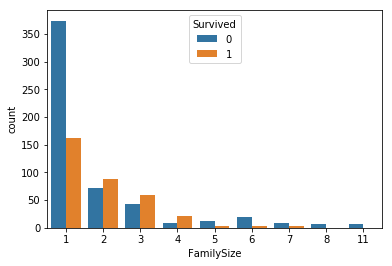

In [38]:
#1 = 혼자탑승. 2부터는 가족이 탑승했다는 뜻. 
#혼자 탑승시, 가족이 탑승했을 때 보다 두배가까이 사망한 것을 확인할 수 있음. 
#하지만 가족이 5명이상(본인포함)일 경우 다시 사망인원이 생존인원보다 더 많음. 

sns.countplot(data=train, x="FamilySize", hue="Survived")

In [39]:
#가족 구성원으로 나눠봄.
#혼자탑승 - single, 2-4명 -핵가족(nuclear), 5명 이상 - 대가족(big)

def family_set(family): 
    if family == 1: 
        return "Single"
    elif 2 <= family < 5:
        return "Nuclear"
    elif family >= 5:
        return "Big"
    
    
train["Family(Group)"] = train["FamilySize"].apply(family_set)

print(train.shape)

train[["FamilySize", "Family(Group)"]].head()

(891, 15)


,FamilySize,Family(Group)
PassengerId,,
1,2,Nuclear
2,2,Nuclear
3,1,Single
4,2,Nuclear
5,1,Single


In [41]:
#피벗테이블 

pd.pivot_table(data=train, index="Family(Group)", values="Survived",
              aggfunc = ["mean", "sum"])

,mean,sum
,Survived,Survived
Family(Group),,
Big,0.161290,10
Nuclear,0.578767,169
Single,0.303538,163


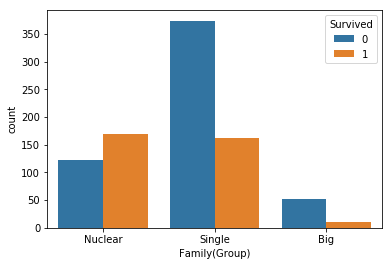

In [42]:
#시각화
#확실히 싱글일 때가 사망이 높다. (ㅠㅠ)

sns.countplot(data=train, x="Family(Group)", hue="Survived")

In [44]:
#이름 분석
#이름 뒤에 Mr.s, Miss, Mr등이 있는 걸 볼 수 있다. 
#Mr.s, Mr. =결혼한 남녀에게 붙이는 호칭, Ms, Master=결혼하지 않는 남녀에게 붙이는 존칭

train["Name"].head(30)

PassengerId
1                               Braund, Mr. Owen Harris
2     Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                Heikkinen, Miss. Laina
4          Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                              Allen, Mr. William Henry
6                                      Moran, Mr. James
7                               McCarthy, Mr. Timothy J
8                        Palsson, Master. Gosta Leonard
9     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                  Nasser, Mrs. Nicholas (Adele Achem)
11                      Sandstrom, Miss. Marguerite Rut
12                             Bonnell, Miss. Elizabeth
13                       Saundercock, Mr. William Henry
14                          Andersson, Mr. Anders Johan
15                 Vestrom, Miss. Hulda Amanda Adolfina
16                     Hewlett, Mrs. (Mary D Kingcome) 
17                                 Rice, Master. Eugene
18                         Williams,

In [49]:
#호칭만 분리해보겠음. 

def get_title(name):
    return name.split(", ")[1].split('. ')[0]

train["Name(title)"] = train["Name"].apply(get_title)
train["Name(title)"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

### 호칭설명

1. 'Mr', 'Mrs', - 결혼한 남녀에게 붙이는 호칭
1. 'Miss', 'Master' -결혼하지 않은 남녀에게 붙이는 호칭 
1. 'Don' - Donnish. 영국에서 옥스퍼드나 케임브리지 대학교수들을 지칭(혹은 남성귀족, 성직자들에 대한 경칭으로도 사용됨)
1. 'Rev'-Reverend. 목회나 카톨릭 신부들을 지칭 
1. 'Dr' -학자(박사)나 의사를 지칭
1. 'Mme'-Madame의 약자. 젊은 부인을 지칭. 
1. 'Ms'- 결혼하지 않은 여성에게 붙이는 호칭 
1. 'Major' -보통은 소령을 나타냄. 
1. 'Lady' -여성을 존중하는 호칭(모르는 여성을 부를 때 쓰는 호칭이라 결혼여부는 판단할 수 없음)
1. 'Sir'-준귀족에게 붙이는 호칭. ex)토머스경
1. 'Mlle' - 아가씨를 지칭하는 호칭. ex)멜라니양(Mlle)
1. 'Col' -군대 대령, 연대장(colonel)
1. 'Capt' -대령
1. 'the Countess' -영국에서는 백작부인을 지칭
1. 'Jonkheer'-작위없는 남자 귀족에 대한 존칭. ~님, ~귀하 

In [81]:
#결혼여부가 판단 가능한 호칭만 추려보겠음. 
#호칭만 분리해보겠음. 

train.loc[train["Name"].str.contains("Mr"), "Title"] = "Mr"
train.loc[train["Name"].str.contains("Miss"), "Title"] = "Miss"
train.loc[train["Name"].str.contains("Mrs"), "Title"] = "Mrs"
train.loc[train["Name"].str.contains("Master"), "Title"] = "Master"
train.loc[train["Name"].str.contains("Ms"), "Title"] = "Miss"
train.loc[train["Name"].str.contains("Mme"), "Title"] = "Mrs"
train.loc[train["Name"].str.contains("Mlle"), "Title"] = "Miss"
train.loc[train["Name"].str.contains("the Countess"), "Title"] = "Mrs"

print(train.shape)
train[["Name", "Title"]].head(10)

(891, 26)


,Name,Title
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
3,"Heikkinen, Miss. Laina",Miss
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
5,"Allen, Mr. William Henry",Mr
6,"Moran, Mr. James",Mr
7,"McCarthy, Mr. Timothy J",Mr
8,"Palsson, Master. Gosta Leonard",Master
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs


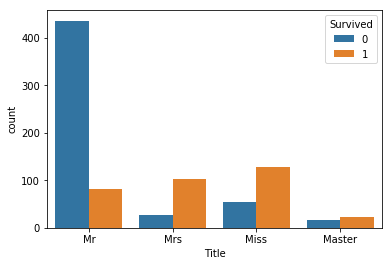

In [53]:
sns.countplot(data=train, x="Title", hue="Survived")

In [54]:
#피벗테이블 
#그래프에서도 보이지만 확실히 여성의 생존율이 높음. 
#그러나 '결혼하지 않은 남성'이 결혼한 남성보다 50%이상의 생존율을 보이는 것을 알 수 있음. 

pd.pivot_table(data=train, index="Title", values="Survived",
              aggfunc = ["mean", "sum"])

,mean,sum
,Survived,Survived
Title,,
Master,0.575000,23
Miss,0.704918,129
Mr,0.158301,82
Mrs,0.792308,103


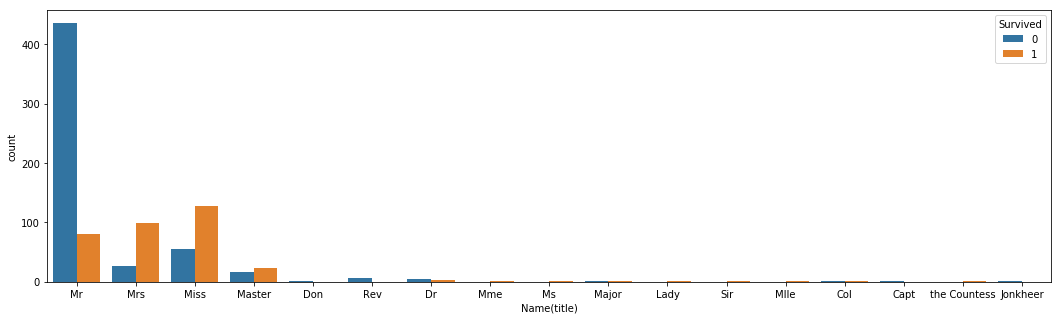

In [56]:
#전체 호칭에 따른 생존 확인 

plt.figure(figsize = (18, 5))
sns.countplot(data=train, x="Name(title)", hue = "Survived")

In [58]:
#전체 호칭에 따른 생존 확인 (피벗테이블)
#그외 호칭은 인원이 작아서 의미가 없는 듯함. 하지만 확실한 건 여성을 지칭하는 호칭(lady, Mlle, Mme, the Countess)을 가진 여성은 모두 생존함. 

pd.pivot_table(data=train, index="Name(title)", values="Survived",
              aggfunc = ["mean", "sum"])

,mean,sum
,Survived,Survived
Name(title),,
Capt,0.000000,0
Col,0.500000,1
Don,0.000000,0
Dr,0.428571,3
Jonkheer,0.000000,0
Lady,1.000000,1
Major,0.500000,1
Master,0.575000,23


### 머신너링을 활용하기 위한 데이터 전처리

In [59]:
# 성별 전처리 

train.loc[train["Sex"] == "male", "Sex_encode"] = 0
train.loc[train["Sex"] == "female", "Sex_encode"] = 1

print(train.shape)

train[["Sex", "Sex_encode"]].head()

(891, 18)


,Sex,Sex_encode
PassengerId,,
1,male,0.0
2,female,1.0
3,female,1.0
4,female,1.0
5,male,0.0


In [60]:
#test 

test.loc[test["Sex"] == "male", "Sex_encode"] = 0
test.loc[test["Sex"] == "female", "Sex_encode"] = 1


print(test.shape)
test[["Sex", "Sex_encode"]].head()


(418, 11)


,Sex,Sex_encode
PassengerId,,
892,male,0.0
893,female,1.0
894,male,0.0
895,male,0.0
896,female,1.0


In [61]:
#빈값 찾아서 넣기 -fare에 존재

train[train["Fare"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age(Group),Fare(Group),FamilySize,Family(Group),Name(title),Title,Sex_encode
PassengerId,,,,,,,,,,,,,,,,,,


In [62]:
#test값에선 빈 값을 찾을 수 있었음. 

test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0.0


In [65]:
#빈값을 채우기 위해서는 데이터의 원본을 훼손시키지 않는 것이 가장 좋음.
#따로 컬럼을 하나 더 만듬. 
#트레인 먼저. 
train["Fare_fillin"] = train["Fare"]
print(train.shape)

train[["Fare", "Fare_fillin"]].head()

(891, 19)


,Fare,Fare_fillin
PassengerId,,
1,7.2500,7.2500
2,71.2833,71.2833
3,7.9250,7.9250
4,53.1000,53.1000
5,8.0500,8.0500


In [66]:
test["Fare_fillin"] = test["Fare"]
print(test.shape)
test[["Fare", "Fare_fillin"]].head()

(418, 12)


,Fare,Fare_fillin
PassengerId,,
892,7.8292,7.8292
893,7.0000,7.0000
894,9.6875,9.6875
895,8.6625,8.6625
896,12.2875,12.2875


In [67]:
#테스트 데이터 빈 값 채우기 
#0을 넣어도 크게 문제는 없을 것 같음. 
test.loc[test["Fare"].isnull(), "Fare_fillin"] = 0
test.loc[test["Fare"].isnull(), ["Fare", "Fare_fillin"]]

,Fare,Fare_fillin
PassengerId,,
1044,NaN,0.0


#### 선착장 전처리 -one hot encoding 처리

  * C == [True, False, False]
  * S == [False, True, False]
  * Q == [False, False, True]

In [69]:
#각각 컬럼을 만들어주고, 탑승한 곳이 세스브루이면 true, 아니면 fales 


train["Embarked_C"] = train["Embarked"] == "C"
train["Embarked_S"] = train["Embarked"] == "S"
train["Embarked_Q"] = train["Embarked"] == "Q"
print(train.shape)
train[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

(891, 22)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
1,S,False,True,False
2,C,True,False,False
3,S,False,True,False
4,S,False,True,False
5,S,False,True,False


In [70]:
#test도 똑같이 처리 

test["Embarked_C"] = test["Embarked"] == "C"
test["Embarked_S"] = test["Embarked"] == "S"
test["Embarked_Q"] = test["Embarked"] == "Q"

print(test.shape)
test[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

(418, 15)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
892,Q,False,False,True
893,S,False,True,False
894,Q,False,False,True
895,S,False,True,False
896,S,False,True,False


In [71]:
#나이컬럼 처리 -어린이와 성인으로 구분. 

train["Child"] = train["Age"] < 15
print(train.shape)
train[["Age", "Child"]].head(10)

(891, 23)


,Age,Child
PassengerId,,
1,22.0,False
2,38.0,False
3,26.0,False
4,35.0,False
5,35.0,False
6,NaN,False
7,54.0,False
8,2.0,True
9,27.0,False


In [72]:
#test
test["Child"] = test["Age"] < 15

print(test.shape)
test[["Age", "Child"]].head(10)

(418, 16)


,Age,Child
PassengerId,,
892,34.5,False
893,47.0,False
894,62.0,False
895,27.0,False
896,22.0,False
897,14.0,True
898,30.0,False
899,26.0,False
900,18.0,False


In [73]:
#test의 패밀리 전처리 

#sibsp- 형제, 자매 탑승인원(본인은 포함되지 않는다)

test["FamilySize"] = test["SibSp"] + test["Parch"] + 1
print(test.shape)
test[["SibSp", "Parch", "FamilySize"]].head()

(418, 17)


,SibSp,Parch,FamilySize
PassengerId,,,
892,0,0,1
893,1,0,2
894,0,0,1
895,0,0,1
896,1,1,3


In [78]:
#가족 구성원으로 나눠봄.
#혼자탑승 - single, 2-4명 -핵가족(nuclear), 5명 이상 - 대가족(big)
    
train["Single"] = train["FamilySize"] == 1
train["Nuclear"] = (train["FamilySize"] > 1) & (train["FamilySize"] < 5)
train["Big"] = train["FamilySize"] >= 5

print(train.shape)

train[["FamilySize", "Single", "Nuclear", "Big"]].head(10)

(891, 26)


,FamilySize,Single,Nuclear,Big
PassengerId,,,,
1,2,False,True,False
2,2,False,True,False
3,1,True,False,False
4,2,False,True,False
5,1,True,False,False
6,1,True,False,False
7,1,True,False,False
8,5,False,False,True
9,3,False,True,False


In [79]:
test["Single"] = test["FamilySize"] == 1
test["Nuclear"] = (test["FamilySize"] > 1) & (test["FamilySize"] < 5)
test["Big"] = test["FamilySize"] >= 5

print(test.shape)

test[["FamilySize", "Single", "Nuclear", "Big"]].head(10)

(418, 20)


,FamilySize,Single,Nuclear,Big
PassengerId,,,,
892,1,True,False,False
893,2,False,True,False
894,1,True,False,False
895,1,True,False,False
896,3,False,True,False
897,1,True,False,False
898,1,True,False,False
899,3,False,True,False
900,1,True,False,False


In [82]:
def get_title(name):
    return name.split(", ")[1].split('. ')[0]

test["Name(title)"] = test["Name"].apply(get_title)
test["Name(title)"].unique()

#Dona - 높은 신분의, 귀족부인을 지칭할 때 사용. 

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [83]:
test.loc[test["Name"].str.contains("Mr"), "Title"] = "Mr"
test.loc[test["Name"].str.contains("Miss"), "Title"] = "Miss"
test.loc[test["Name"].str.contains("Mrs"), "Title"] = "Mrs"
test.loc[test["Name"].str.contains("Master"), "Title"] = "Master"
test.loc[test["Name"].str.contains("Ms"), "Title"] = "Miss"
test.loc[test["Name"].str.contains("Dona"), "Title"] = "Mrs"


print(train.shape)

train[["Name", "Title"]].head(10)

(891, 26)


,Name,Title
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
3,"Heikkinen, Miss. Laina",Miss
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
5,"Allen, Mr. William Henry",Mr
6,"Moran, Mr. James",Mr
7,"McCarthy, Mr. Timothy J",Mr
8,"Palsson, Master. Gosta Leonard",Master
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs


In [84]:
#마스터가 생존율이 50%이상이기 때문에, 마스터컬럼만 따로 만들어준다. 

train["Master"] = train["Name"].str.contains("Master")
print(train.shape)
train[["Name", "Master"]].head(10)

(891, 27)


,Name,Master
PassengerId,,
1,"Braund, Mr. Owen Harris",False
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",False
3,"Heikkinen, Miss. Laina",False
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False
5,"Allen, Mr. William Henry",False
6,"Moran, Mr. James",False
7,"McCarthy, Mr. Timothy J",False
8,"Palsson, Master. Gosta Leonard",True
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",False


In [85]:
test["Master"] = test["Name"].str.contains("Master")
print(test.shape)
test[["Name", "Master"]].head(10)

(418, 23)


,Name,Master
PassengerId,,
892,"Kelly, Mr. James",False
893,"Wilkes, Mrs. James (Ellen Needs)",False
894,"Myles, Mr. Thomas Francis",False
895,"Wirz, Mr. Albert",False
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",False
897,"Svensson, Mr. Johan Cervin",False
898,"Connolly, Miss. Kate",False
899,"Caldwell, Mr. Albert Francis",False
900,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",False


## train 

In [101]:
feature_names = ["Pclass", "Sex_encode", "Fare_fillin",
                 "Child", "Single", "Nuclear", "Big", "Master"]
feature_names

['Pclass',
 'Sex_encode',
 'Fare_fillin',
 'Child',
 'Single',
 'Nuclear',
 'Big',
 'Master']

In [102]:
label_name = "Survived"
label_name

'Survived'

In [103]:
X_train = train[feature_names]

print(X_train.shape)

X_train.head()

(891, 8)


,Pclass,Sex_encode,Fare_fillin,Child,Single,Nuclear,Big,Master
PassengerId,,,,,,,,
1,3,0.0,7.2500,False,False,True,False,False
2,1,1.0,71.2833,False,False,True,False,False
3,3,1.0,7.9250,False,True,False,False,False
4,1,1.0,53.1000,False,False,True,False,False
5,3,0.0,8.0500,False,True,False,False,False


In [104]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(418, 8)


,Pclass,Sex_encode,Fare_fillin,Child,Single,Nuclear,Big,Master
PassengerId,,,,,,,,
892,3,0.0,7.8292,False,True,False,False,False
893,3,1.0,7.0000,False,False,True,False,False
894,2,0.0,9.6875,False,True,False,False,False
895,3,0.0,8.6625,False,True,False,False,False
896,3,1.0,12.2875,False,False,True,False,False


In [105]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [106]:
from sklearn.tree import DecisionTreeClassifier

#깊이는 8이 가장 적절하다고 함. 
model = DecisionTreeClassifier(max_depth=8, random_state=0)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [107]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [108]:
predictions = model.predict(X_test)

print(predictions.shape)
predictions[0:10]

(418,)


array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0])

In [109]:
submission = pd.read_csv("gender_submission.csv", index_col="PassengerId")

print(submission.shape)
submission.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [110]:
submission["Survived"] = predictions
print(submission.shape)
submission.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [111]:
submission.to_csv("titanic_2.csv")